In [1]:
import MeCab
m = MeCab.Tagger()
out = m.parse('파워레인저 메캅포스가 잘 설치되었는지 확인해보자!')
print(out)

파워레인저	NNP,*,F,파워레인저,*,*,*,*
메	NNP,인명,F,메,*,*,*,*
캅	NNP,인명,T,캅,*,*,*,*
포스	NNG,*,F,포스,*,*,*,*
가	JKS,*,F,가,*,*,*,*
잘	MAG,*,T,잘,*,*,*,*
설치	NNG,행위,F,설치,*,*,*,*
되	XSV,*,F,되,*,*,*,*
었	EP,*,T,었,*,*,*,*
는지	EC,*,F,는지,*,*,*,*
확인	NNG,행위,T,확인,*,*,*,*
해	XSV+EC,*,F,해,Inflect,XSV,EC,하/XSV/*+아/EC/*
보	VX,*,F,보,*,*,*,*
자	EF,*,F,자,*,*,*,*
!	SF,*,*,*,*,*,*,*
EOS



In [2]:
from konlpy.tag import Kkma
Kkma_pos = Kkma()
K_nouns = Kkma_pos.nouns('지금 코엔엘파이 형태소 분석기를 사용중이며, 교회가기 전에 설치되어서 다행이라고 생각하고 있습니다.')
print(K_nouns)

['지금', '코엔', '코엔엘파이', '엘', '파이', '형태소', '분석기', '사용', '사용중', '중', '교회', '교회가기', '가기', '전', '설치', '다행', '생각']


In [3]:
import nltk

# 메캅, 코엔엘파이, 엔엘티케이 모두 설치완료

In [1]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('./data/ChatbotData .csv', encoding='utf-8')
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [3]:
sentences = list(data.Q) + list(data.A)
sentences

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [6]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

from konlpy.tag import Twitter, Okt# 책이랑 다른 점. Okt가 트위터만 가져와서는 작동을 안한다.

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

<function matplotlib.pyplot.show(close=None, block=None)>

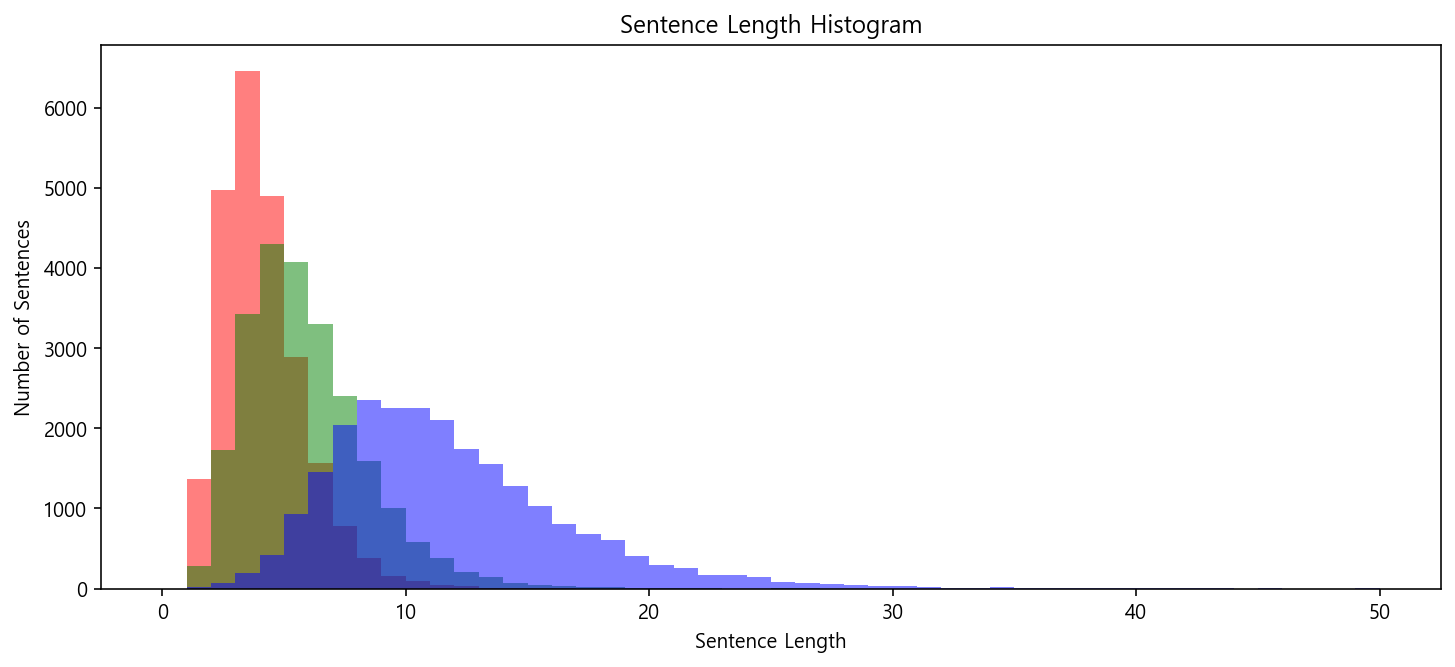

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r',label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g',label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b',label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

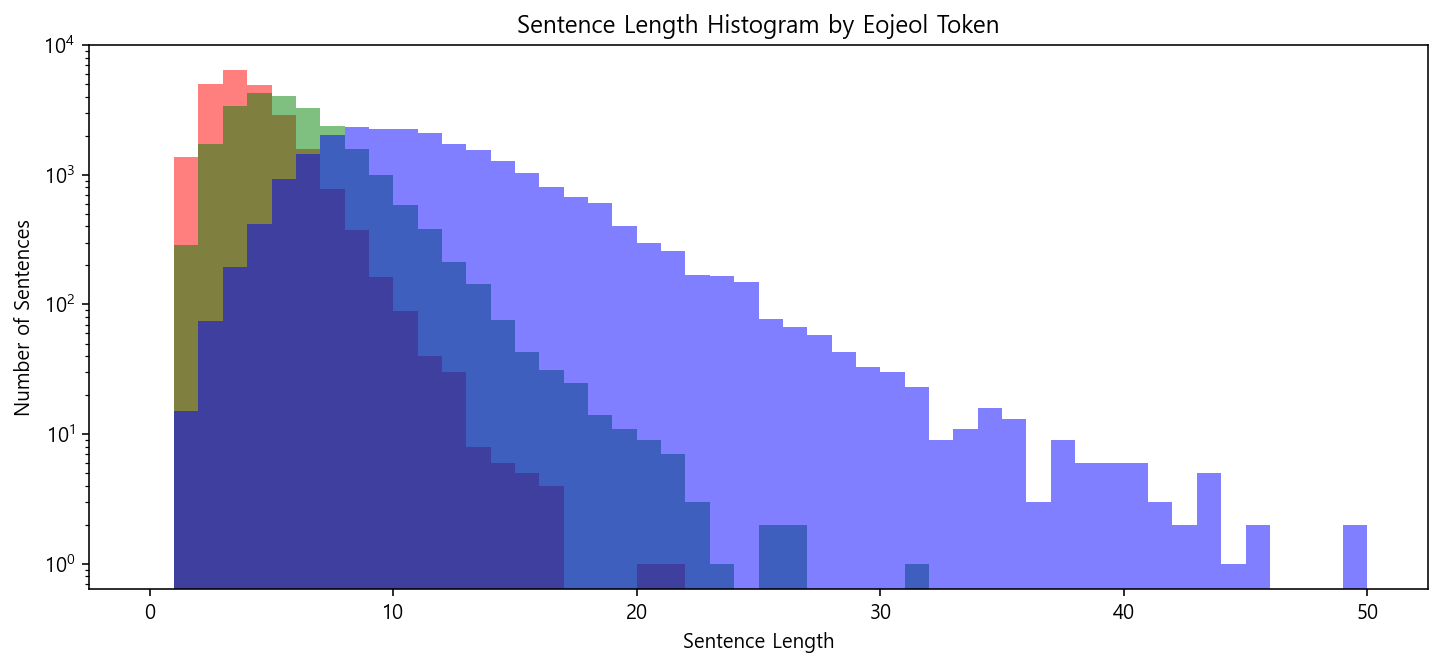

In [14]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r',label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g',label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b',label='eumjeol')
plt.yscale('log') # 로그 씌움으로 차이가 큰 특이값들에 대해서도 비교해서 볼 수 있다(꼬리 볼수있음)
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show

# 어절=20이상, 음절이나 형태소=30,45이상에서 이상치 존재
# 입력 문장 길이 설정시에 기준으로 참고 가능